# USA Regional Sales Analysis

## Author: Gul Amiz Ibrahimi (Flora)

## Project Summary
This EDA notebook dives into Acme Co.’s 2014–2018 USA sales dataset through:

- Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

- Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

- Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

- Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

- Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

## Problem
Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

## Objective
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit
- Uncover seasonal trends and anomalies for optimized planning
- Spot pricing and margin risks from outlier transactions
- Inform pricing, promotion, and market-expansion strategies

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

## Initial Setup Stage

In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook configuration
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
file_path = 'Regional Sales Dataset.xlsx'

# Read all sheets
sheets = pd.read_excel(file_path, sheet_name=None)

# Assign to dataframes
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

# Quick check
print("Data loaded successfully!")
print(f"\nDataset shapes:")
print(f"  Sales Orders: {df_sales.shape}")
print(f"  Customers: {df_customers.shape}")
print(f"  Products: {df_products.shape}")
print(f"  Regions: {df_regions.shape}")
print(f"  State Regions: {df_state_reg.shape}")
print(f"  2017 Budgets: {df_budgets.shape}")

Data loaded successfully!

Dataset shapes:
  Sales Orders: (64104, 12)
  Customers: (175, 2)
  Products: (30, 2)
  Regions: (994, 15)
  State Regions: (49, 3)
  2017 Budgets: (30, 2)


## Data profiling / Initial Inspection

In [3]:
# QUICK DATA SHAPE OVERVIEW
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [4]:
# Data exploration step
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
# RAW DATAFRAMES
# Printing first few rows for each sheet

print("\n—-- df_sales head --—")
display(df_sales.head())
print()

print("\n—-- df_customers head --—")
display(df_customers.head())
print()

print("\n—-- df_products head --—")
display(df_products.head())
print()

print("\n—-- df_regions head —--")
display(df_regions.head())
print()

print("\n—-- df_state_reg head —--")
display(df_state_reg.head())
print()

print("\n—-- df_budgets head --—")
display(df_budgets.head())

# End of RAW DATA FRAME ANALYSIS


—-- df_sales head --—


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




—-- df_customers head --—


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




—-- df_products head --—


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




—-- df_regions head —--


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




—-- df_state_reg head —--


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




—-- df_budgets head --—


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [7]:
# The first row of df_state_reg would contain the real column names. 
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

In [8]:
# Identifying null values (or zero values)
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [9]:
# Removing duplicates from the data
len(df_sales) == len(df_sales.drop_duplicates())

True

## Data Cleaning Stage

In [10]:
# DATA WRANGLING & MERGING

# Merging with customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# Merging with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Merging with different Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merging with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Merging with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# To clean up redundant columns or trim it
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

# End of data wrangling

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [11]:
# Converting all column names to lowercase for consistency and easier access of data
df.columns = df.columns.str.lower()

In [12]:
# Displaying the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

## Data naming modification

In [13]:
# DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)

# 1) What columns to keep:
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]


# 2) Rename to more user friendly names
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

# End of this section

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [14]:
# Blanking out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspecting the changes
df[['order_date', 'product_name', 'revenue', 'budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [15]:
# Get information about current data frame to inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [16]:
# check for missing values in each column of the dataset
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

## Feature Engineering Stage

In [17]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df

# End of this step

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


# Exploratory Analysis Stage

## 1. Monthly Sales Trend Over Time

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

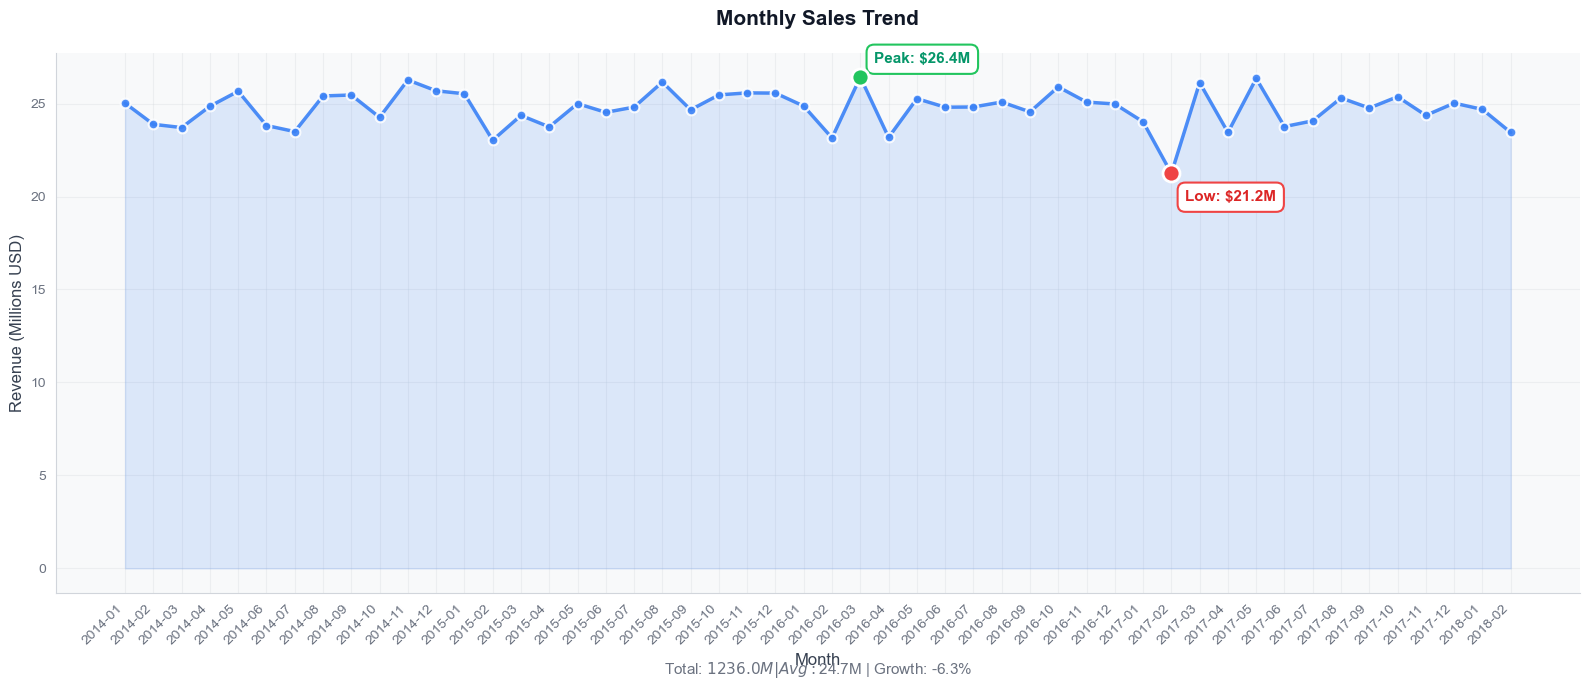

In [58]:
from matplotlib.ticker import FuncFormatter

# Convert to monthly periods and calculate revenue
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set up the figure
fig, ax = plt.subplots(figsize=(16, 7))
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Convert Period index to string for plotting
months = monthly_sales.index.astype(str)
revenue = monthly_sales.values / 1e6

# Plot the trend line
ax.plot(range(len(months)), revenue, 
        linewidth=2.5, color='#3b82f6', alpha=0.9,
        marker='o', markersize=7, markerfacecolor='#3b82f6',
        markeredgecolor='white', markeredgewidth=1.5)

# Add light fill under the curve
ax.fill_between(range(len(months)), revenue, alpha=0.15, color='#3b82f6')

# Highlight peak and trough
max_idx = np.argmax(revenue)
min_idx = np.argmin(revenue)

ax.scatter(max_idx, revenue[max_idx], s=150, color='#22c55e', 
           marker='o', edgecolor='white', linewidth=2, zorder=5)
ax.annotate(f'Peak: ${revenue[max_idx]:.1f}M', 
            xy=(max_idx, revenue[max_idx]), 
            xytext=(10, 10), textcoords='offset points',
            fontsize=11, color='#059669', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#22c55e', linewidth=1.5))

ax.scatter(min_idx, revenue[min_idx], s=150, color='#ef4444', 
           marker='o', edgecolor='white', linewidth=2, zorder=5)
ax.annotate(f'Low: ${revenue[min_idx]:.1f}M', 
            xy=(min_idx, revenue[min_idx]), 
            xytext=(10, -20), textcoords='offset points',
            fontsize=11, color='#dc2626', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#ef4444', linewidth=1.5))

# Set up the axes
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, fontsize=10, rotation=45, ha='right')
ax.tick_params(colors='#6b7280')

# Title and labels
ax.set_title('Monthly Sales Trend', 
             fontsize=15, fontweight='600', color='#111827', pad=20)
ax.set_xlabel('Month', fontsize=12, fontweight='500', color='#374151')
ax.set_ylabel('Revenue (Millions USD)', fontsize=12, fontweight='500', color='#374151')

# Grid styling
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax.set_axisbelow(True)

# Clean borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')

# Add summary stats
total_revenue = monthly_sales.sum() / 1e6
avg_monthly = monthly_sales.mean() / 1e6
growth = ((revenue[-1] - revenue[0]) / revenue[0]) * 100

stats_text = f'Total: ${total_revenue:.1f}M | Avg: ${avg_monthly:.1f}M | Growth: {growth:+.1f}%'
ax.text(0.5, -0.15, stats_text, transform=ax.transAxes, 
        ha='center', fontsize=11, color='#6b7280')

plt.tight_layout()
plt.show()


## Insights on the visualization:

Sales consistently cycle between 24-26 Millions, with clear peaks in late spring to early summer (May–June) and troughs each January. The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern. However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

# 2. Monthly Sales Trend - All years combination

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

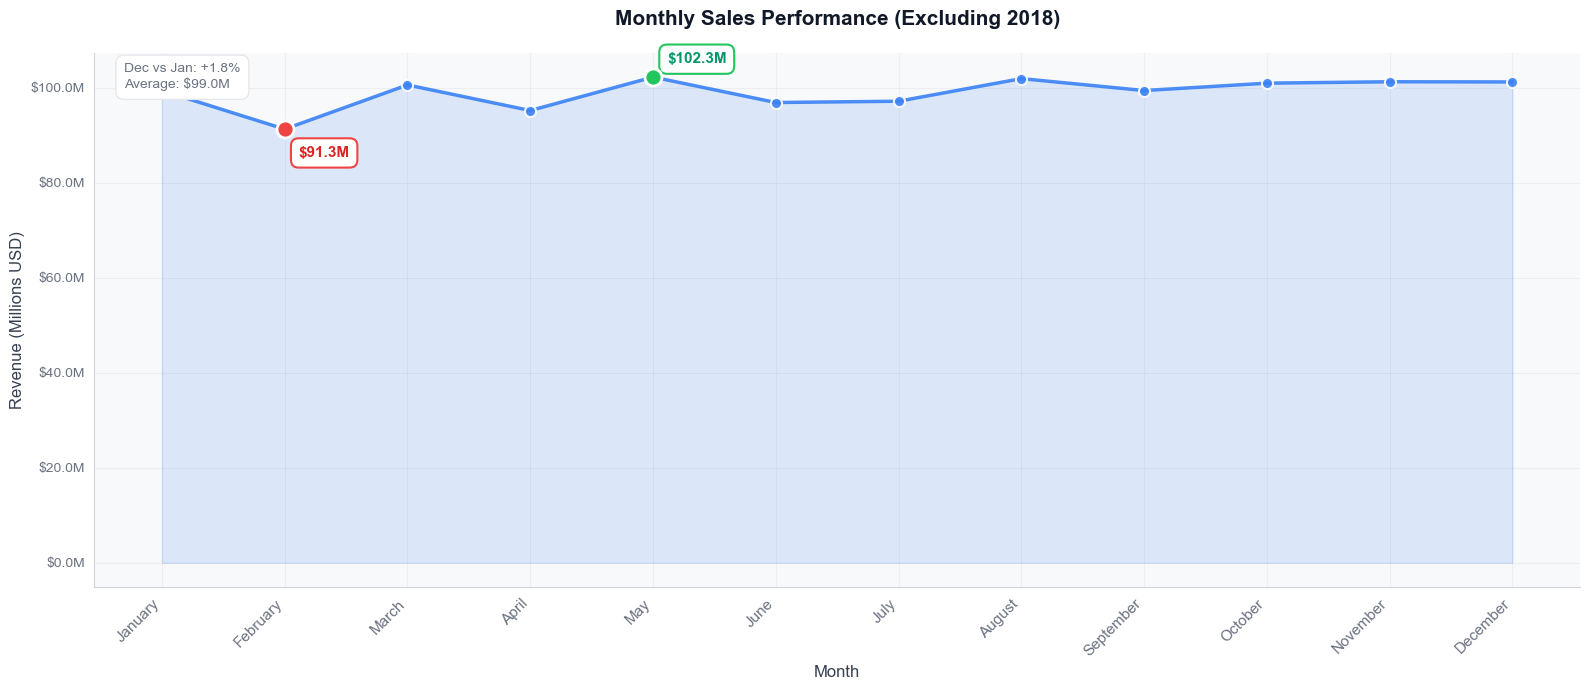

In [59]:
from matplotlib.ticker import FuncFormatter

# Filter out 2018 data
df_ = df[df['order_date'].dt.year != 2018]

# Group by month and sum revenue
monthly_sales = (
    df_.groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# Set up the chart
fig, ax = plt.subplots(figsize=(16, 7))
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Prepare data
months = monthly_sales.index.get_level_values(1)
revenue = monthly_sales.values / 1e6

# Plot trend line
ax.plot(range(len(months)), revenue, 
        linewidth=2.5, color='#3b82f6', alpha=0.9,
        marker='o', markersize=8, markerfacecolor='#3b82f6',
        markeredgecolor='white', markeredgewidth=1.5)

# Fill under curve
ax.fill_between(range(len(months)), revenue, alpha=0.15, color='#3b82f6')

# Mark peak and low
max_idx = np.argmax(revenue)
min_idx = np.argmin(revenue)

ax.scatter(max_idx, revenue[max_idx], s=150, color='#22c55e', 
           marker='o', edgecolor='white', linewidth=2, zorder=5)
ax.annotate(f'${revenue[max_idx]:.1f}M', 
            xy=(max_idx, revenue[max_idx]), 
            xytext=(10, 10), textcoords='offset points',
            fontsize=11, color='#059669', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#22c55e', linewidth=1.5))

ax.scatter(min_idx, revenue[min_idx], s=150, color='#ef4444', 
           marker='o', edgecolor='white', linewidth=2, zorder=5)
ax.annotate(f'${revenue[min_idx]:.1f}M', 
            xy=(min_idx, revenue[min_idx]), 
            xytext=(10, -20), textcoords='offset points',
            fontsize=11, color='#dc2626', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#ef4444', linewidth=1.5))

# Axes setup
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, fontsize=11, rotation=45, ha='right')
ax.tick_params(colors='#6b7280')

# Title and labels
ax.set_title('Monthly Sales Performance (Excluding 2018)', 
             fontsize=15, fontweight='600', color='#111827', pad=20)
ax.set_xlabel('Month', fontsize=12, fontweight='500', color='#374151')
ax.set_ylabel('Revenue (Millions USD)', fontsize=12, fontweight='500', color='#374151')

# Grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax.set_axisbelow(True)

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'${x:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Clean borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')

# Add summary stats
trend_change = revenue[-1] - revenue[0]
avg_revenue = np.mean(revenue)
growth = (trend_change / revenue[0]) * 100

stats_text = f"Dec vs Jan: {growth:+.1f}%\nAverage: ${avg_revenue:.1f}M"
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=10, color='#6b7280', verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='white', 
                 edgecolor='#e5e7eb', linewidth=1))

plt.tight_layout()
plt.show()

## Insights on the chart:
Across all years, January begins strong with roughly 99 M, or around 95 M. Sales rebound in May and August around 102 M or around 99-101 M from September to December. This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

# 3. Top 10 products by revenue in (Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

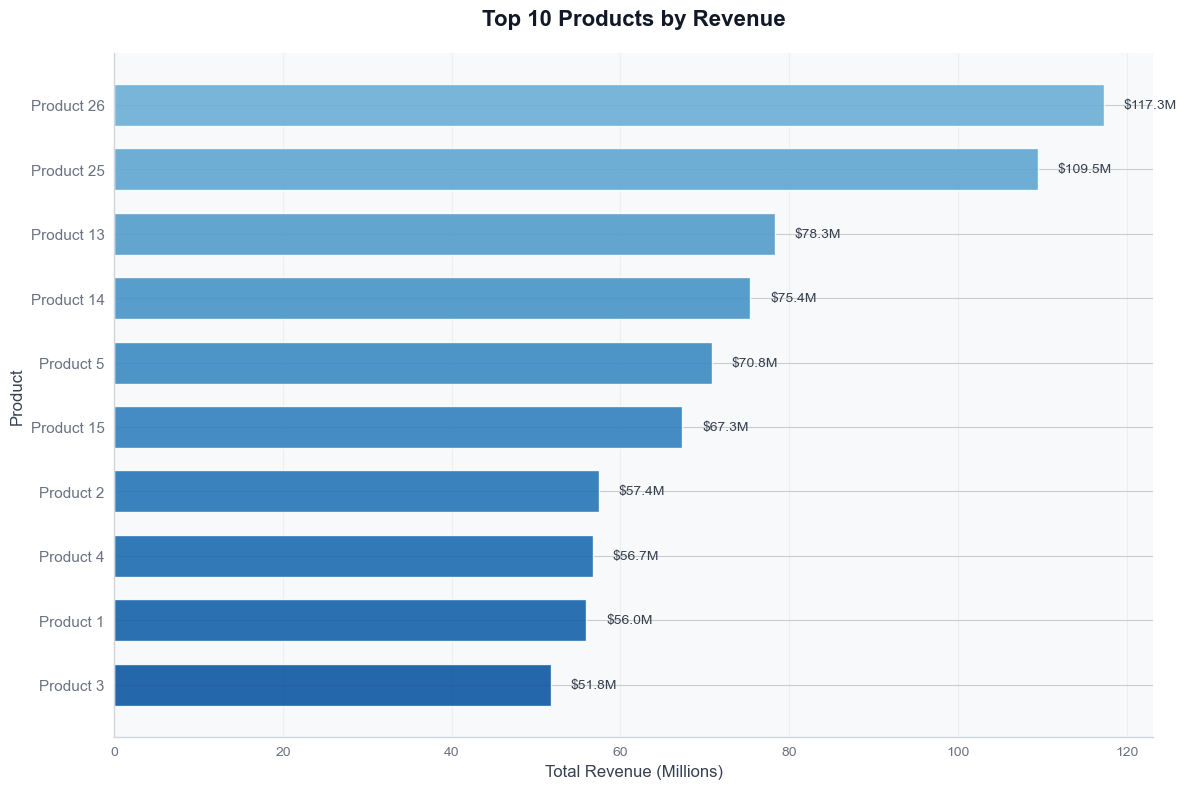

In [19]:
# Get total revenue by product (in millions)
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000
top_prod = top_prod.nlargest(10)

# Set up the chart
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')

# Use a simple color gradient
colors = plt.cm.Blues(np.linspace(0.5, 0.85, len(top_prod)))

# Create the bars
bars = plt.barh(range(len(top_prod)), top_prod.values, 
                color=colors, height=0.65, alpha=0.9)

# Set up product names on y-axis
ax.set_yticks(range(len(top_prod)))
ax.set_yticklabels(top_prod.index, fontsize=11)
ax.invert_yaxis()  # highest at top

# Add revenue labels to the bars
for i, (idx, value) in enumerate(top_prod.items()):
    plt.text(value + max(top_prod.values) * 0.02, i, f'${value:.1f}M', 
            va='center', ha='left', fontsize=10, fontweight='500', color='#374151')

# Title and labels
plt.title('Top 10 Products by Revenue', 
         fontsize=16, fontweight='600', color='#111827', pad=20)
plt.xlabel('Total Revenue (Millions)', fontsize=12, fontweight='500', color='#374151')
plt.ylabel('Product', fontsize=12, fontweight='500', color='#374151')

# Simple grid
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax.set_axisbelow(True)

# Clean up the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Tick styling
ax.tick_params(colors='#6b7280')

plt.tight_layout()
plt.show()

# End of visualization

## Insights of the chart
Products 26 and 25 pull away at 118 - 110 M, with a sharp drop to 78M. The bottom four cluster at 52-57 M, highlighting similar constraints. Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

# Top 10 products by average profit margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

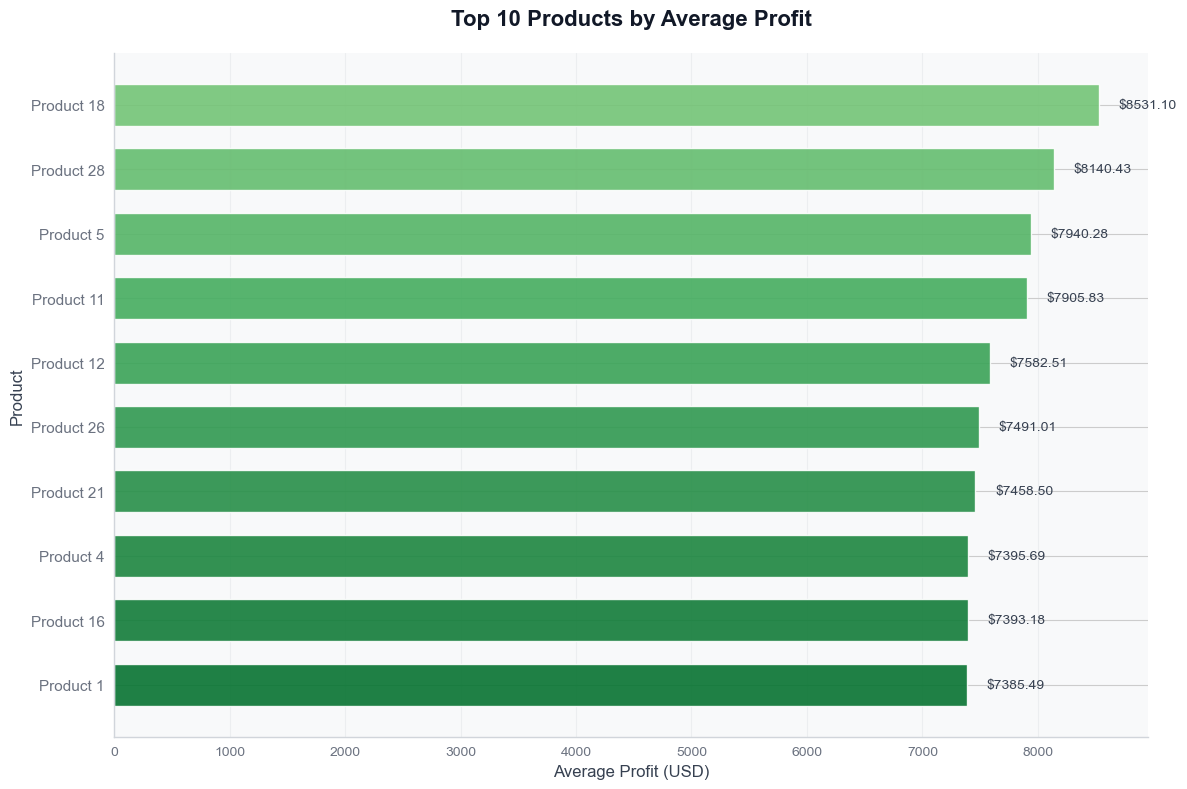

In [20]:
# Get average profit by product, take top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Set up the chart
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')

# Use a clean color gradient
colors = plt.cm.Greens(np.linspace(0.5, 0.85, len(top_margin)))

# Create the bars
bars = plt.barh(range(len(top_margin)), top_margin.values, 
                color=colors, height=0.65, alpha=0.9)

# Set up product names on y-axis
ax.set_yticks(range(len(top_margin)))
ax.set_yticklabels(top_margin.index, fontsize=11)
ax.invert_yaxis()  # highest at top

# Add profit labels to the bars
for i, (idx, value) in enumerate(top_margin.items()):
    plt.text(value + max(top_margin.values) * 0.02, i, f'${value:.2f}', 
            va='center', ha='left', fontsize=10, fontweight='500', color='#374151')

# Title and labels
plt.title('Top 10 Products by Average Profit', 
         fontsize=16, fontweight='600', color='#111827', pad=20)
plt.xlabel('Average Profit (USD)', fontsize=12, fontweight='500', color='#374151')
plt.ylabel('Product', fontsize=12, fontweight='500', color='#374151')

# Simple grid
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax.set_axisbelow(True)

# Clean up the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Tick styling
ax.tick_params(colors='#6b7280')

plt.tight_layout()
plt.show()

# End of visualization

## Insights
Products 18 and 28 lead with average profit margins of approximately 8.1–8.5 K. Mid-tier performers like Products 12, 26, and 21 cluster in the 
7.4–7.9 K. Focusing on margin optimization strategies from top performers may help elevate overall product profitability.

# Sales by Channel (Pie Chart)

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

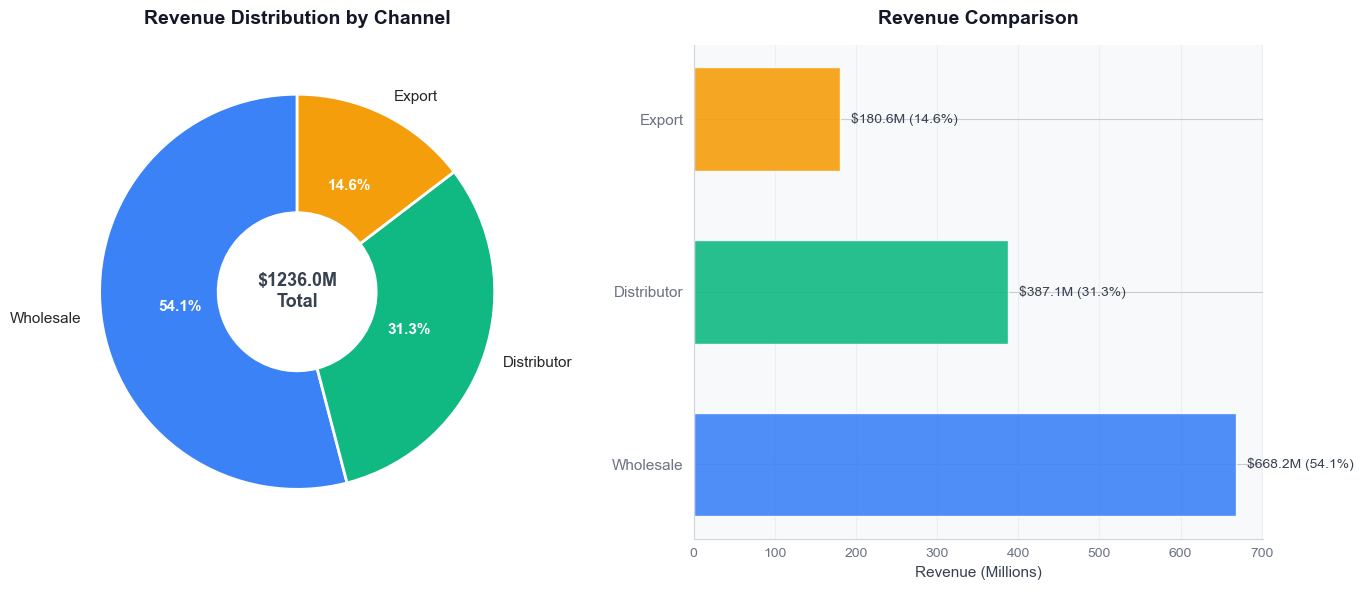

In [21]:
# Group revenue by channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Calculate percentages
total_revenue = chan_sales.sum()
percentages = (chan_sales / total_revenue * 100).round(1)

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

# Left side - Pie chart
colors = ['#3b82f6', '#10b981', '#f59e0b', '#ef4444', '#8b5cf6', '#ec4899']
colors = colors[:len(chan_sales)]

# Create a simple donut chart
wedges, texts, autotexts = ax1.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2),
    textprops={'fontsize': 11}
)

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('600')

# Add total in the center
ax1.text(0, 0, f'${total_revenue/1e6:.1f}M\nTotal', 
         ha='center', va='center', fontsize=13, fontweight='600', color='#374151')

ax1.set_title('Revenue Distribution by Channel', 
              fontsize=14, fontweight='600', color='#111827', pad=15)

# Right side - Bar chart for easier comparison
bars = ax2.barh(range(len(chan_sales)), chan_sales.values/1e6, 
                color=colors, alpha=0.9, height=0.6)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, chan_sales.values)):
    ax2.text(bar.get_width() + max(chan_sales.values)/1e6 * 0.02, 
             bar.get_y() + bar.get_height()/2,
             f'${value/1e6:.1f}M ({percentages.iloc[i]:.1f}%)', 
             ha='left', va='center', fontsize=10, fontweight='500', color='#374151')

# Clean up the bar chart
ax2.set_yticks(range(len(chan_sales)))
ax2.set_yticklabels(chan_sales.index, fontsize=11)
ax2.set_xlabel('Revenue (Millions)', fontsize=11, fontweight='500', color='#374151')
ax2.set_title('Revenue Comparison', 
              fontsize=14, fontweight='600', color='#111827', pad=15)

# Grid and styling
ax2.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#d1d5db')
ax2.spines['bottom'].set_color('#d1d5db')
ax2.tick_params(colors='#6b7280')
ax2.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# End of visualization

## Insights
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

# 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

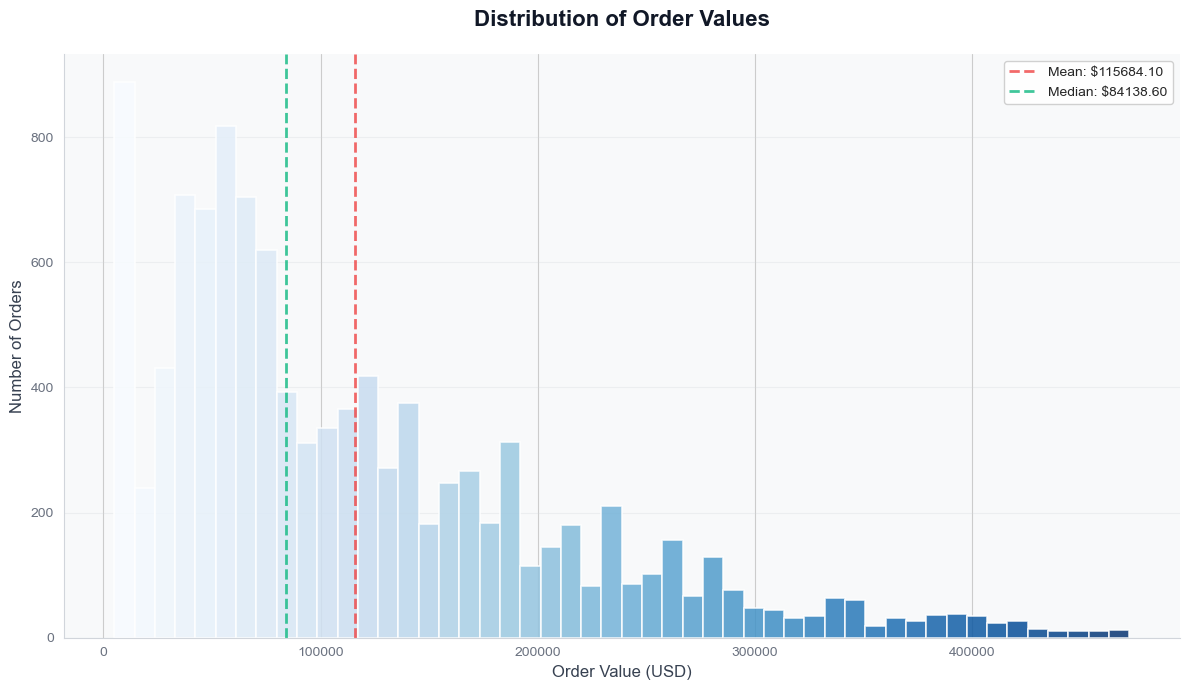

In [23]:
# Get total revenue per order
aov = df.groupby('order_number')['revenue'].sum()

# Set up the chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Create the histogram
n, bins, patches = ax.hist(
    aov, 
    bins=50, 
    color='#3b82f6', 
    edgecolor='white',
    alpha=0.85,
    linewidth=1.2
)

# Add a subtle gradient effect to the bars
# Bars get darker as values increase
cm = plt.cm.Blues
norm = plt.Normalize(vmin=bins.min(), vmax=bins.max())
for i, patch in enumerate(patches):
    patch.set_facecolor(cm(norm(bins[i])))

# Calculate and show some summary stats
mean_val = aov.mean()
median_val = aov.median()

# Add vertical lines for mean and median
ax.axvline(mean_val, color='#ef4444', linestyle='--', linewidth=2, 
           label=f'Mean: ${mean_val:.2f}', alpha=0.8)
ax.axvline(median_val, color='#10b981', linestyle='--', linewidth=2, 
           label=f'Median: ${median_val:.2f}', alpha=0.8)

# Title and labels
ax.set_title('Distribution of Order Values', 
             fontsize=16, fontweight='600', color='#111827', pad=20)
ax.set_xlabel('Order Value (USD)', fontsize=12, fontweight='500', color='#374151')
ax.set_ylabel('Number of Orders', fontsize=12, fontweight='500', color='#374151')

# Add legend
ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

# Grid styling
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db', axis='y')
ax.set_axisbelow(True)

# Clean up borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')

# Tick styling
ax.tick_params(colors='#6b7280')

plt.tight_layout()
plt.show()

# End of visualization

## Insight
The order‐value distribution is heavily right‐skewed, with most orders clustering between 20K - 120 K and a pronounced mode around 50 - 60 K.

A long tail of high-value transactions extends up toward 
500 K, but these large orders represent only a small share of total volume.

# Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

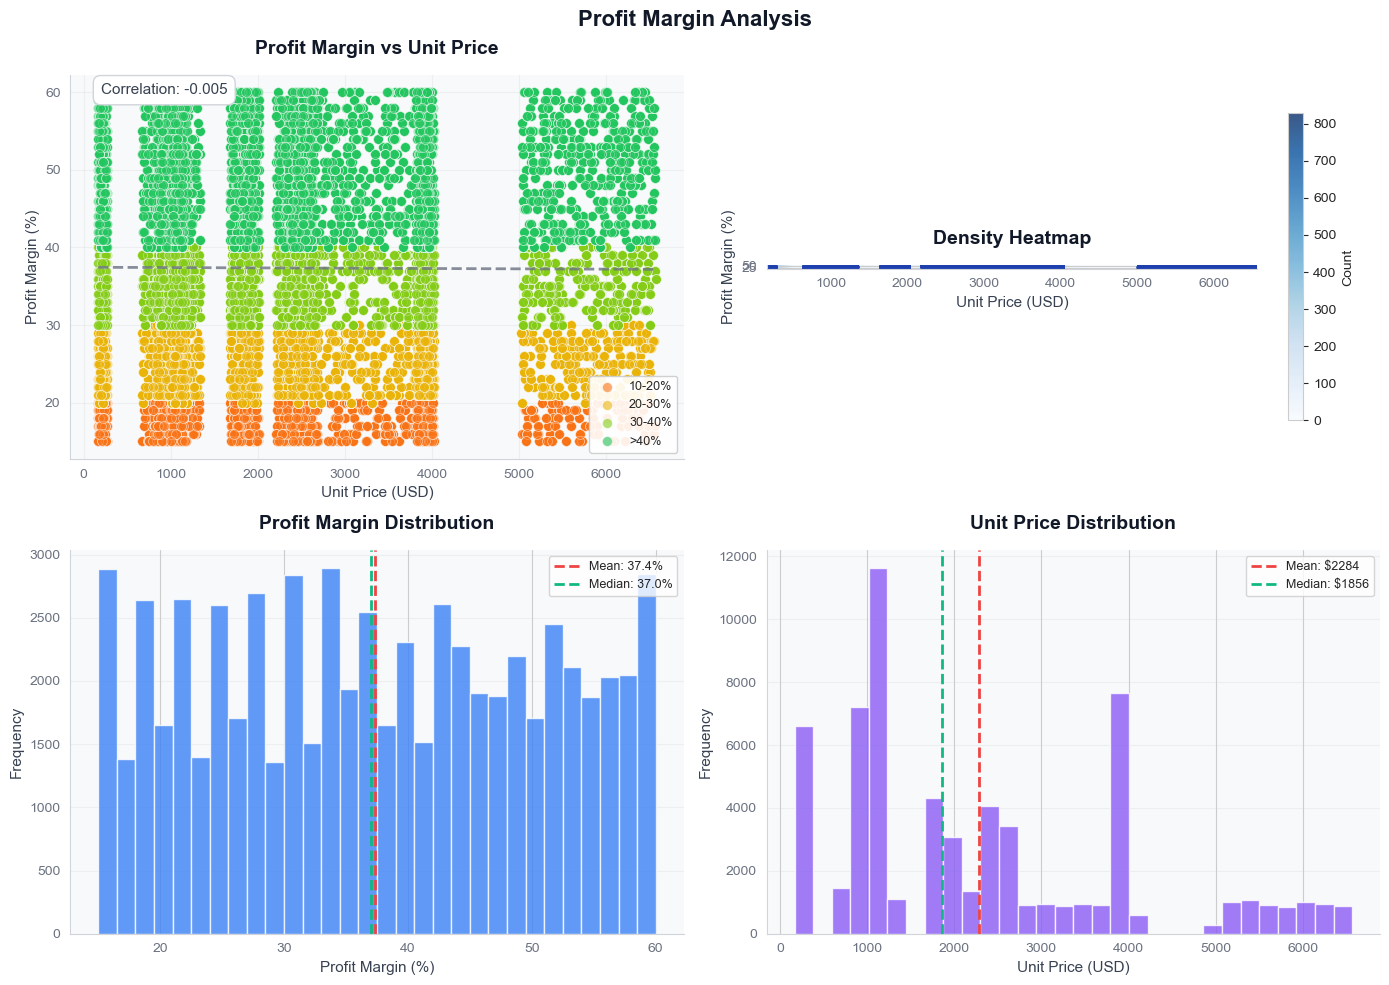


Top 10 Highest Margin Products:
product_name  unit_price  profit_margin_pct
   Product 4      5708.4               60.0
  Product 28      5313.1               60.0
  Product 28      5313.1               60.0
  Product 13       180.9               60.0
  Product 18      3912.8               60.0
   Product 6       201.0               60.0
  Product 12      2579.5               60.0
   Product 9      1018.4               60.0
  Product 13      3906.1               60.0
   Product 4      5708.4               60.0

Bottom 10 Lowest Margin Products:
product_name  unit_price  profit_margin_pct
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 19      1896.1               15.0
  Product 19      1896.1               15.0
  Product 19      1896.1               15.0
  Produc

In [25]:
# Calculate profit margin percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set up a 2x2 grid for multiple views
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('white')

# Top-left: Main scatter plot with color-coded margins
profit_ranges = pd.cut(df['profit_margin_pct'], 
                      bins=[-np.inf, 10, 20, 30, 40, np.inf],
                      labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%'])
colors = ['#ef4444', '#f97316', '#eab308', '#84cc16', '#22c55e']
color_map = dict(zip(profit_ranges.cat.categories, colors))

for category, color in color_map.items():
    mask = profit_ranges == category
    if mask.any():
        ax1.scatter(df.loc[mask, 'unit_price'], 
                   df.loc[mask, 'profit_margin_pct'],
                   c=color, alpha=0.6, s=50, 
                   label=category,
                   edgecolors='white', linewidths=0.5)

# Add a trend line
z = np.polyfit(df['unit_price'], df['profit_margin_pct'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
ax1.plot(x_trend, p(x_trend), '--', color='#6b7280', linewidth=2, alpha=0.8)

# Show correlation
correlation = df['unit_price'].corr(df['profit_margin_pct'])
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax1.transAxes, fontsize=11, fontweight='500',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                  edgecolor='#d1d5db', linewidth=1),
         color='#374151')

ax1.set_title('Profit Margin vs Unit Price', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax1.set_xlabel('Unit Price (USD)', fontsize=11, fontweight='500', color='#374151')
ax1.set_ylabel('Profit Margin (%)', fontsize=11, fontweight='500', color='#374151')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax1.legend(loc='best', framealpha=0.9, fontsize=9)
ax1.set_facecolor('#f8f9fa')

# Top-right: Density heatmap
x = df['unit_price']
y = df['profit_margin_pct']
hist, xedges, yedges = np.histogram2d(x, y, bins=25)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = ax2.imshow(hist.T, extent=extent, origin='lower', cmap='Blues', alpha=0.8)
ax2.scatter(x, y, alpha=0.2, s=15, c='#1e40af', edgecolors='none')

ax2.set_title('Density Heatmap', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax2.set_xlabel('Unit Price (USD)', fontsize=11, fontweight='500', color='#374151')
ax2.set_ylabel('Profit Margin (%)', fontsize=11, fontweight='500', color='#374151')
plt.colorbar(im, ax=ax2, label='Count', shrink=0.8)
ax2.set_facecolor('#f8f9fa')

# Bottom-left: Profit margin distribution
ax3.hist(df['profit_margin_pct'], bins=30, alpha=0.8, color='#3b82f6', 
         edgecolor='white', linewidth=1)
mean_margin = df['profit_margin_pct'].mean()
median_margin = df['profit_margin_pct'].median()

ax3.axvline(mean_margin, color='#ef4444', linestyle='--', 
           linewidth=2, label=f'Mean: {mean_margin:.1f}%')
ax3.axvline(median_margin, color='#10b981', linestyle='--', 
           linewidth=2, label=f'Median: {median_margin:.1f}%')

ax3.set_title('Profit Margin Distribution', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax3.set_xlabel('Profit Margin (%)', fontsize=11, fontweight='500', color='#374151')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='500', color='#374151')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db', axis='y')
ax3.set_facecolor('#f8f9fa')

# Bottom-right: Unit price distribution
ax4.hist(df['unit_price'], bins=30, alpha=0.8, color='#8b5cf6', 
         edgecolor='white', linewidth=1)
mean_price = df['unit_price'].mean()
median_price = df['unit_price'].median()

ax4.axvline(mean_price, color='#ef4444', linestyle='--', 
           linewidth=2, label=f'Mean: ${mean_price:.0f}')
ax4.axvline(median_price, color='#10b981', linestyle='--', 
           linewidth=2, label=f'Median: ${median_price:.0f}')

ax4.set_title('Unit Price Distribution', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax4.set_xlabel('Unit Price (USD)', fontsize=11, fontweight='500', color='#374151')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='500', color='#374151')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db', axis='y')
ax4.set_facecolor('#f8f9fa')

# Clean up borders on all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#d1d5db')
    ax.spines['bottom'].set_color('#d1d5db')
    ax.tick_params(colors='#6b7280')

# Main title
fig.suptitle('Profit Margin Analysis', fontsize=16, fontweight='600', 
             color='#111827', y=0.98)

plt.tight_layout()
plt.show()

# Print top and bottom performers for reference
print("\nTop 10 Highest Margin Products:")
top_margin = df.nlargest(10, 'profit_margin_pct')[['product_name', 'unit_price', 'profit_margin_pct']]
print(top_margin.to_string(index=False))

print("\nBottom 10 Lowest Margin Products:")
bottom_margin = df.nsmallest(10, 'profit_margin_pct')[['product_name', 'unit_price', 'profit_margin_pct']]
print(bottom_margin.to_string(index=False))

# End of visualization

# Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_9832/1358665267.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


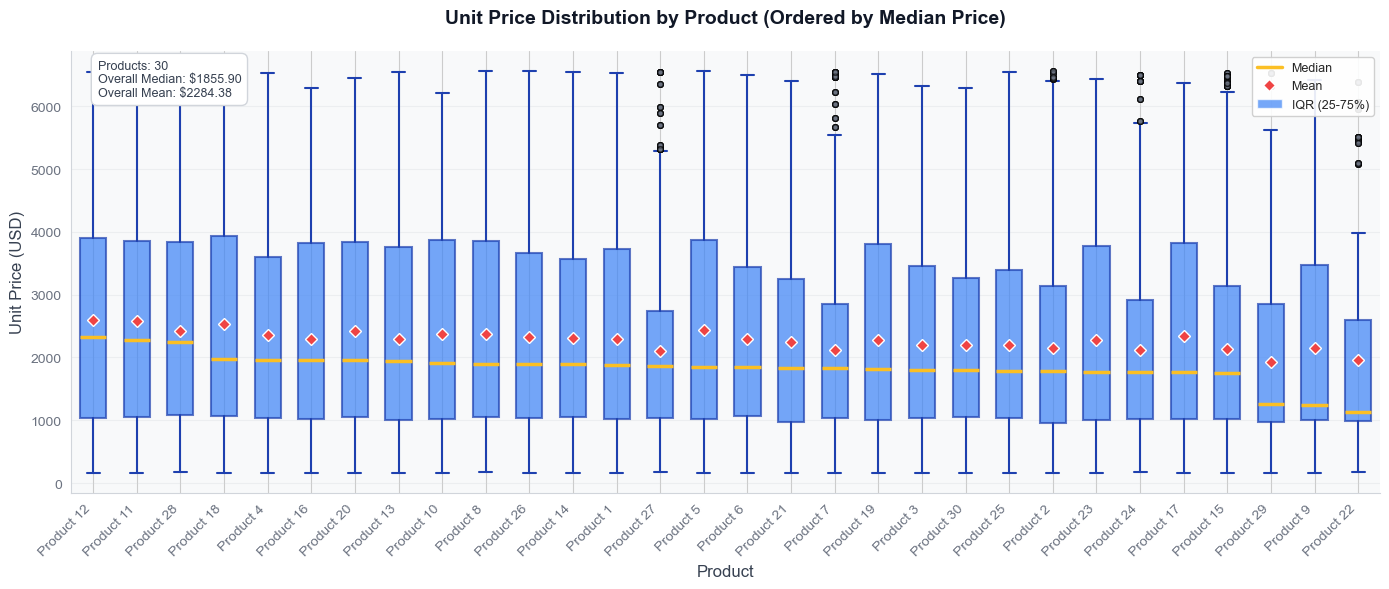


Price Statistics by Product:
----------------------------------------------------------------------
              Count     Mean   Median  Std Dev    Min     Max
product_name                                                 
Product 12     1098  2596.01  2324.90  1904.27  167.5  6545.9
Product 11     1026  2584.83  2278.00  1759.23  167.5  6505.7
Product 28      996  2424.11  2244.50  1699.25  174.2  6405.2
Product 18     2082  2536.09  1983.20  1779.49  167.5  6559.3
Product 4      2886  2362.68  1956.40  1703.19  167.5  6539.2
Product 16     1926  2299.69  1956.40  1648.90  167.5  6291.3
Product 20     1980  2418.11  1953.05  1701.76  167.5  6445.4
Product 13     3948  2300.69  1943.00  1636.38  167.5  6545.9
Product 10      870  2371.94  1916.20  1612.94  167.5  6210.9
Product 8      1002  2375.97  1902.80  1668.32  180.9  6559.3
Product 26     5928  2333.24  1889.40  1687.47  167.5  6559.3
Product 14     3858  2310.45  1889.40  1615.43  167.5  6545.9
Product 1      2904  2297.30  1

In [28]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Calculate median price per product and sort for better visualization
product_medians = df.groupby('product_name')['unit_price'].median().sort_values(ascending=False)
product_order = product_medians.index.tolist()

# Create boxplot with ordered products (highest median first)
bp = ax.boxplot(
    [df[df['product_name'] == prod]['unit_price'].values for prod in product_order],
    labels=product_order,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='#ef4444', markeredgecolor='white', markersize=6),
    boxprops=dict(facecolor='#3b82f6', alpha=0.7, edgecolor='#1e40af', linewidth=1.5),
    whiskerprops=dict(color='#1e40af', linewidth=1.5),
    capprops=dict(color='#1e40af', linewidth=1.5),
    medianprops=dict(color='#fbbf24', linewidth=2.5),
    flierprops=dict(marker='o', markerfacecolor='#6b7280', markersize=4, alpha=0.5)
)

# Add horizontal grid for easier reading
ax.grid(True, axis='y', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax.set_axisbelow(True)

# Title and labels
ax.set_title('Unit Price Distribution by Product (Ordered by Median Price)', 
             fontsize=14, fontweight='600', color='#111827', pad=20)
ax.set_xlabel('Product', fontsize=12, fontweight='500', color='#374151')
ax.set_ylabel('Unit Price (USD)', fontsize=12, fontweight='500', color='#374151')

# Rotate labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.tick_params(colors='#6b7280')

# Add a legend explaining the boxplot elements
legend_elements = [
    plt.Line2D([0], [0], color='#fbbf24', linewidth=2.5, label='Median'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#ef4444', 
               markersize=6, label='Mean', linestyle='None'),
    plt.Rectangle((0,0), 1, 1, facecolor='#3b82f6', alpha=0.7, label='IQR (25-75%)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9, framealpha=0.9)

# Add summary stats in corner
total_products = len(product_order)
overall_median = df['unit_price'].median()
overall_mean = df['unit_price'].mean()
stats_text = f'Products: {total_products}\nOverall Median: ${overall_median:.2f}\nOverall Mean: ${overall_mean:.2f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                 edgecolor='#d1d5db', linewidth=1),
        color='#374151')

# Clean borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d1d5db')
ax.spines['bottom'].set_color('#d1d5db')

plt.tight_layout()
plt.show()

# Print some useful summary stats
print("\nPrice Statistics by Product:")
print("-" * 70)
summary = df.groupby('product_name')['unit_price'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
summary = summary.sort_values('median', ascending=False)
summary.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(summary.round(2).to_string())

## Insights 
Products 8, 17, 27, 20, and 28 show high-end revenue spikes, well above their upper whiskers, likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 
100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

# Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

- Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
- X‑axis in millions USD, Y‑axis listing regions


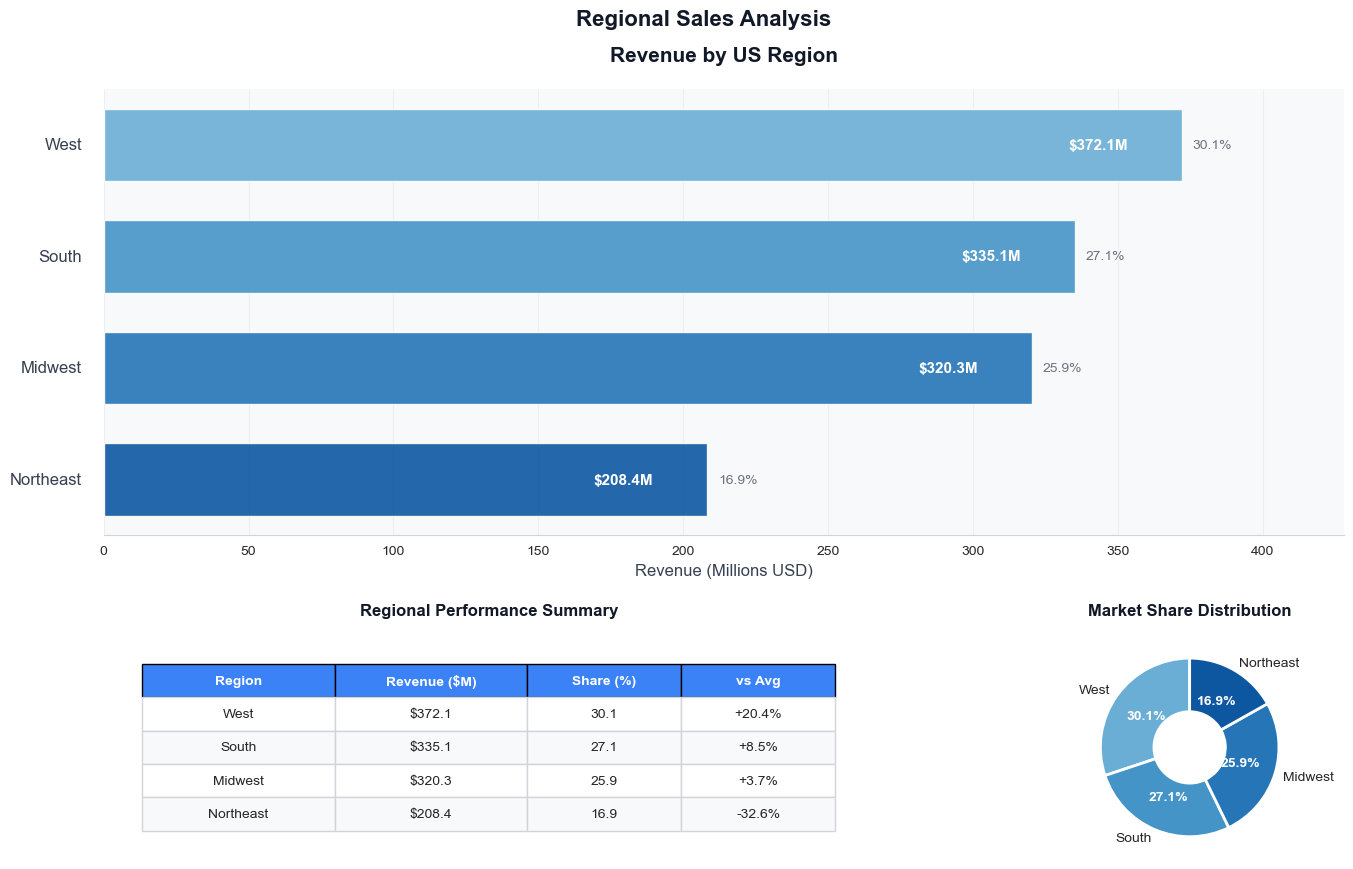


Regional Sales Summary
--------------------------------------------------
West        : $ 372.1M ( 30.1%) [ +20.4% vs avg]
South       : $ 335.1M ( 27.1%) [  +8.5% vs avg]
Midwest     : $ 320.3M ( 25.9%) [  +3.7% vs avg]
Northeast   : $ 208.4M ( 16.9%) [ -32.6% vs avg]
--------------------------------------------------
Total       : $1236.0M
Average     : $ 309.0M


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Aggregate sales by region (in millions)
region_sales = (
    df.groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)

# Set up the layout - main chart with supporting visuals
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], width_ratios=[2.5, 1],
                      hspace=0.3, wspace=0.3)

# Main bar chart
ax_main = fig.add_subplot(gs[0, :])
ax_main.set_facecolor('#f8f9fa')

# Use a clean color gradient
colors = plt.cm.Blues(np.linspace(0.5, 0.85, len(region_sales)))

# Create horizontal bars
bars = ax_main.barh(range(len(region_sales)), region_sales.values, 
                    color=colors, height=0.65, alpha=0.9)

# Add region labels and values
for i, (region, value) in enumerate(region_sales.items()):
    # Value label on the bar
    ax_main.text(value - max(region_sales.values) * 0.05, i, 
                f'${value:.1f}M', va='center', ha='right', 
                fontweight='600', fontsize=11, color='white')
    
    # Region name on the left
    ax_main.text(-max(region_sales.values) * 0.02, i, 
                region, va='center', ha='right', 
                fontweight='500', fontsize=12, color='#374151')

# Calculate and show market share
total_sales = region_sales.sum()
market_share = (region_sales / total_sales * 100).round(1)

for i, (region, share) in enumerate(market_share.items()):
    ax_main.text(region_sales[region] + max(region_sales.values) * 0.01, i,
                f'{share}%', va='center', ha='left', 
                fontweight='500', fontsize=10, color='#6b7280')

# Clean up the axes
ax_main.set_xlim(0, max(region_sales.values) * 1.15)
ax_main.set_ylim(-0.5, len(region_sales) - 0.5)
ax_main.set_yticks([])
ax_main.invert_yaxis()

ax_main.set_title('Revenue by US Region', 
                  fontsize=15, fontweight='600', color='#111827', pad=20)
ax_main.set_xlabel('Revenue (Millions USD)', fontsize=12, fontweight='500', 
                   color='#374151')

# Grid and borders
ax_main.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax_main.set_axisbelow(True)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)
ax_main.spines['left'].set_visible(False)
ax_main.spines['bottom'].set_color('#d1d5db')

# Market share pie chart
ax_pie = fig.add_subplot(gs[1, 1])
wedges, texts, autotexts = ax_pie.pie(
    region_sales.values, 
    labels=region_sales.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2),
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('600')

ax_pie.set_title('Market Share Distribution', fontsize=12, fontweight='600', 
                color='#111827', pad=15)

# Summary statistics table
ax_stats = fig.add_subplot(gs[1, 0])
ax_stats.axis('off')

# Calculate key metrics
top_region = region_sales.index[0]
top_revenue = region_sales.iloc[0]
avg_revenue = region_sales.mean()

# Create comparison data
comparison_data = pd.DataFrame({
    'Region': region_sales.index,
    'Revenue ($M)': [f'${v:.1f}' for v in region_sales.values],
    'Share (%)': [f'{s:.1f}' for s in market_share.values],
    'vs Avg': [f'{((v/avg_revenue-1)*100):+.1f}%' for v in region_sales.values]
})

# Create table
table = ax_stats.table(
    cellText=comparison_data.values,
    colLabels=comparison_data.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.25, 0.25, 0.2, 0.2]
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table headers
for i in range(len(comparison_data.columns)):
    table[(0, i)].set_facecolor('#3b82f6')
    table[(0, i)].set_text_props(weight='600', color='white')

# Alternate row colors
for i in range(1, len(comparison_data) + 1):
    for j in range(len(comparison_data.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f8f9fa')
        else:
            table[(i, j)].set_facecolor('white')
        table[(i, j)].set_edgecolor('#d1d5db')

ax_stats.set_title('Regional Performance Summary', fontsize=12, fontweight='600', 
                  color='#111827', pad=15)

# Overall title
fig.suptitle('Regional Sales Analysis', fontsize=16, fontweight='600', 
             color='#111827', y=0.96)

# # Add key insight
# insight = f'Total Revenue: ${total_sales:.1f}M  |  Average per Region: ${avg_revenue:.1f}M  |  Top Region: {top_region} ({market_share.iloc[0]:.1f}%)'
# fig.text(0.5, 0.92, insight, ha='center', fontsize=11, color='#6b7280')

fig.patch.set_facecolor('white')
plt.show()

# Print summary for reference
print("\nRegional Sales Summary")
print("-" * 50)
for region, revenue in region_sales.items():
    share = market_share[region]
    vs_avg = ((revenue/avg_revenue-1)*100)
    print(f"{region:12s}: ${revenue:6.1f}M ({share:5.1f}%) [{vs_avg:+6.1f}% vs avg]")
print("-" * 50)
print(f"{'Total':12s}: ${total_sales:6.1f}M")
print(f"{'Average':12s}: ${avg_revenue:6.1f}M")

# 10. Total Sales by State (Choropleth Map)
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

- States shaded by total sales (in millions USD) using a blue gradient
- Legend on the right showing sales scale (M USD)
- Hover tooltips display exact sales for each state
- Map scoped to USA for clear regional context

In [31]:
import plotly.express as px
import plotly.graph_objects as go

# Aggregate revenue by state
state_sales = df.groupby('state')['revenue'].sum().reset_index()
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

# Calculate some summary stats for context
total_revenue = state_sales['revenue_m'].sum()
top_state = state_sales.loc[state_sales['revenue_m'].idxmax(), 'state']
top_revenue = state_sales['revenue_m'].max()

# Create the choropleth map
fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m': 'Revenue (Millions)'},
    color_continuous_scale='Blues',
    hover_name='state',
    hover_data={
        'state': False,  # hide duplicate state code
        'revenue_m': ':.2f'
    }
)

# Update the layout for a cleaner look
fig.update_layout(
    title={
        'text': 'Total Revenue by State',
        'font': {'size': 18, 'color': '#111827', 'family': 'Arial, sans-serif'},
        'x': 0.5,
        'xanchor': 'center'
    },
    geo=dict(
        bgcolor='#f8f9fa',
        lakecolor='#e5e7eb',
        landcolor='#ffffff',
        projection_type='albers usa'
    ),
    coloraxis_colorbar=dict(
        title='Revenue<br>(Millions USD)',
        ticksuffix='M',
        thickness=15,
        len=0.7,
        x=1.02
    ),
    margin=dict(l=10, r=80, t=60, b=20),
    paper_bgcolor='white',
    font=dict(family='Arial, sans-serif', color='#374151')
)

# Customize hover template for better readability
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Revenue: $%{z:.2f}M<extra></extra>'
)

fig.show()

# Print summary for quick reference
print("\nState Sales Summary")
print("-" * 50)
print(f"Total Revenue: ${total_revenue:.1f}M")
print(f"Top State: {top_state} (${top_revenue:.1f}M)")
print(f"Number of States: {len(state_sales)}")
print(f"Average per State: ${state_sales['revenue_m'].mean():.1f}M")
print(f"Median: ${state_sales['revenue_m'].median():.1f}M")
print("\nTop 5 States by Revenue:")
top_5 = state_sales.nlargest(5, 'revenue_m')
for idx, row in top_5.iterrows():
    print(f"  {row['state']}: ${row['revenue_m']:.2f}M")


State Sales Summary
--------------------------------------------------
Total Revenue: $1236.0M
Top State: CA ($228.8M)
Number of States: 47
Average per State: $26.3M
Median: $14.6M

Top 5 States by Revenue:
  CA: $228.79M
  IL: $111.05M
  FL: $90.20M
  TX: $84.01M
  NY: $55.53M


## Insights of the chart
- California leads with  230M followed by Illinois 112M and Florida (90 M) .
- Mid‑tier states (e.g., Texas 85M, New York 55 M) hold steady performance but trail the top three by 40–145 M.
- Lower‑tier states (e.g., New Jersey 47M, down to Massachusetts 35 M) reveal a gradual drop, indicating uneven market penetration.
- Action: Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.

# 11. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

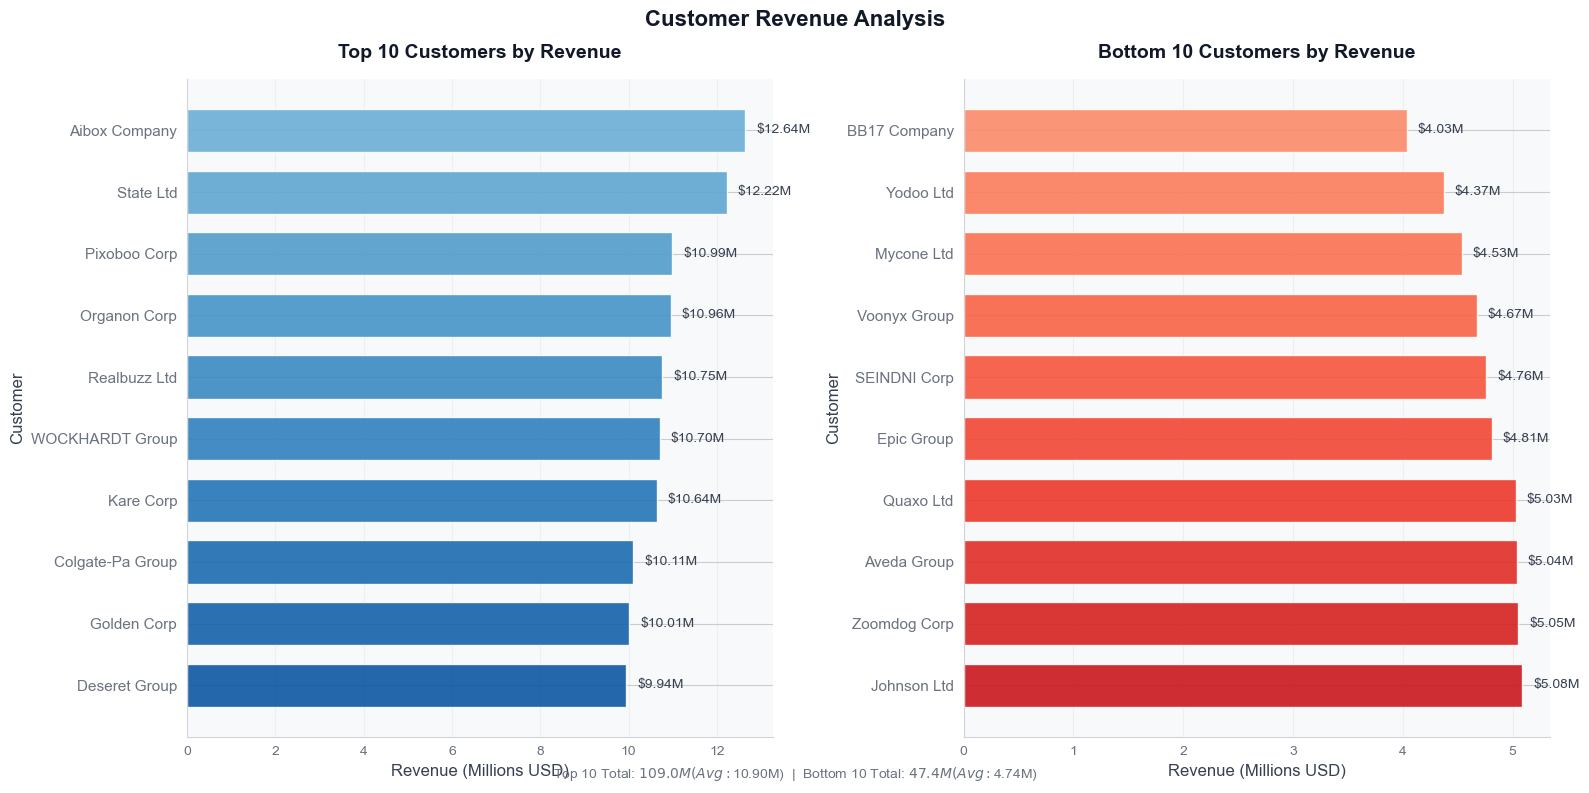


Customer Revenue Analysis
----------------------------------------------------------------------
Top 10 customers contribute: $108.95M
Bottom 10 customers contribute: $47.38M
Revenue gap (top vs bottom): $61.58M
Average top customer: $10.90M
Average bottom customer: $4.74M


In [32]:
# Calculate total revenue per customer
customer_revenue = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)

# Get top and bottom 10
top_rev = customer_revenue.head(10)
bottom_rev = customer_revenue.tail(10).sort_values(ascending=True)

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('white')

# Left: Top 10 customers
colors_top = plt.cm.Blues(np.linspace(0.5, 0.85, len(top_rev)))
bars1 = ax1.barh(range(len(top_rev)), top_rev.values / 1e6, 
                 color=colors_top, height=0.7, alpha=0.9)

# Add value labels
for i, (customer, value) in enumerate(top_rev.items()):
    ax1.text(value / 1e6 + max(top_rev.values) / 1e6 * 0.02, i,
             f'${value / 1e6:.2f}M', va='center', ha='left', 
             fontsize=10, fontweight='500', color='#374151')

ax1.set_yticks(range(len(top_rev)))
ax1.set_yticklabels(top_rev.index, fontsize=11)
ax1.invert_yaxis()

ax1.set_title('Top 10 Customers by Revenue', 
              fontsize=14, fontweight='600', color='#111827', pad=15)
ax1.set_xlabel('Revenue (Millions USD)', fontsize=12, fontweight='500', color='#374151')
ax1.set_ylabel('Customer', fontsize=12, fontweight='500', color='#374151')

# Grid and styling
ax1.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#d1d5db')
ax1.spines['bottom'].set_color('#d1d5db')
ax1.tick_params(colors='#6b7280')
ax1.set_facecolor('#f8f9fa')

# Right: Bottom 10 customers
colors_bottom = plt.cm.Reds(np.linspace(0.4, 0.75, len(bottom_rev)))
bars2 = ax2.barh(range(len(bottom_rev)), bottom_rev.values / 1e6, 
                 color=colors_bottom, height=0.7, alpha=0.9)

# Add value labels
for i, (customer, value) in enumerate(bottom_rev.items()):
    ax2.text(value / 1e6 + max(bottom_rev.values) / 1e6 * 0.02, i,
             f'${value / 1e6:.2f}M', va='center', ha='left', 
             fontsize=10, fontweight='500', color='#374151')

ax2.set_yticks(range(len(bottom_rev)))
ax2.set_yticklabels(bottom_rev.index, fontsize=11)
ax2.invert_yaxis()

ax2.set_title('Bottom 10 Customers by Revenue', 
              fontsize=14, fontweight='600', color='#111827', pad=15)
ax2.set_xlabel('Revenue (Millions USD)', fontsize=12, fontweight='500', color='#374151')
ax2.set_ylabel('Customer', fontsize=12, fontweight='500', color='#374151')

# Grid and styling
ax2.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#d1d5db')
ax2.spines['bottom'].set_color('#d1d5db')
ax2.tick_params(colors='#6b7280')
ax2.set_facecolor('#f8f9fa')

# Overall title
fig.suptitle('Customer Revenue Analysis', fontsize=16, fontweight='600', 
             color='#111827', y=0.98)

# Add summary stats
total_top = top_rev.sum()
total_bottom = bottom_rev.sum()
avg_top = top_rev.mean()
avg_bottom = bottom_rev.mean()

summary = f'Top 10 Total: ${total_top/1e6:.1f}M (Avg: ${avg_top/1e6:.2f}M)  |  Bottom 10 Total: ${total_bottom/1e6:.1f}M (Avg: ${avg_bottom/1e6:.2f}M)'
fig.text(0.5, 0.02, summary, ha='center', fontsize=10, color='#6b7280')

plt.tight_layout()
plt.show()

# Print detailed stats
print("\nCustomer Revenue Analysis")
print("-" * 70)
print(f"Top 10 customers contribute: ${total_top/1e6:.2f}M")
print(f"Bottom 10 customers contribute: ${total_bottom/1e6:.2f}M")
print(f"Revenue gap (top vs bottom): ${(total_top - total_bottom)/1e6:.2f}M")
print(f"Average top customer: ${avg_top/1e6:.2f}M")
print(f"Average bottom customer: ${avg_bottom/1e6:.2f}M")

# 12. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

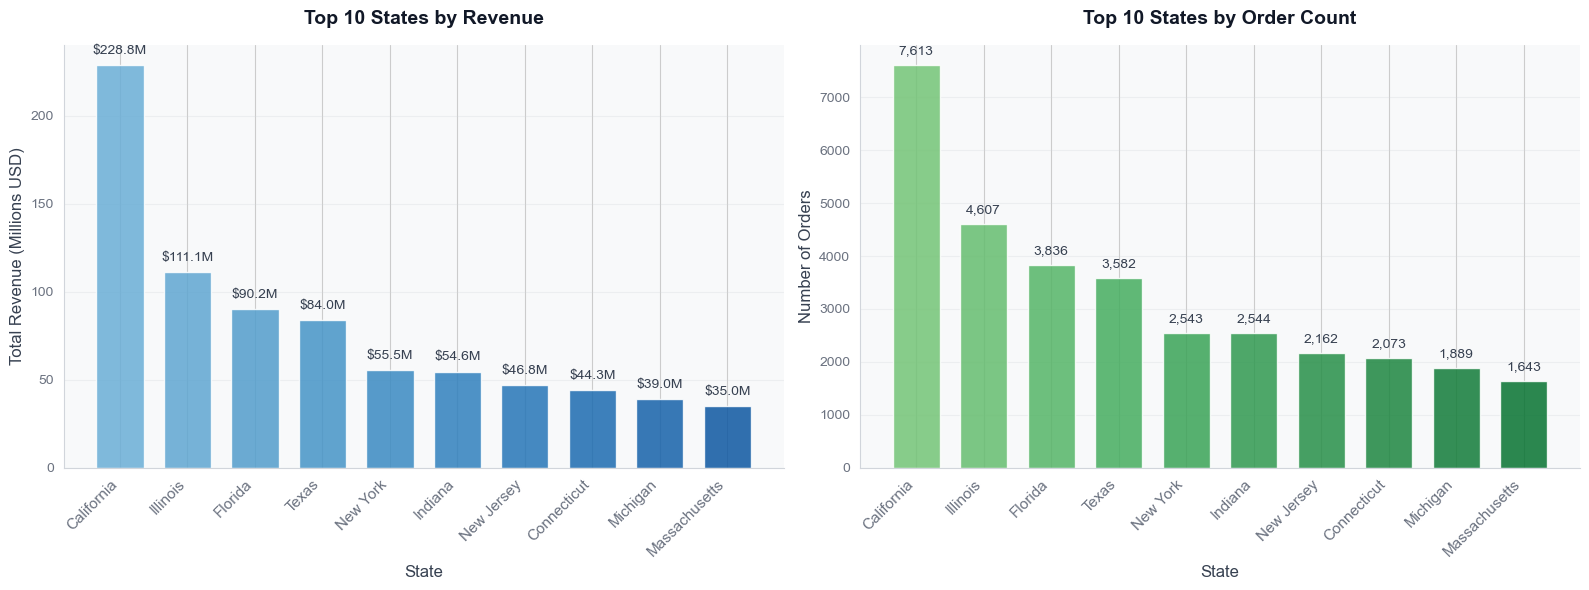

In [40]:
# Get revenue and order count by state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

# Set up side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('white')

# Left: Revenue chart
colors_rev = plt.cm.Blues(np.linspace(0.5, 0.85, len(state_rev)))
bars1 = ax1.bar(range(len(state_rev)), state_rev['revenue'] / 1e6,
                color=colors_rev, alpha=0.85, width=0.7)

# Add value labels
for i, (state, value) in enumerate(state_rev['revenue'].items()):
    ax1.text(i, value / 1e6 + state_rev['revenue'].max() / 1e6 * 0.02,
             f'${value / 1e6:.1f}M', ha='center', va='bottom',
             fontsize=10, fontweight='500', color='#374151')

ax1.set_xticks(range(len(state_rev)))
ax1.set_xticklabels(state_rev.index, rotation=45, ha='right', fontsize=11)
ax1.set_title('Top 10 States by Revenue', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax1.set_xlabel('State', fontsize=12, fontweight='500', color='#374151')
ax1.set_ylabel('Total Revenue (Millions USD)', fontsize=12, fontweight='500', color='#374151')

# Grid and styling
ax1.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#d1d5db')
ax1.spines['bottom'].set_color('#d1d5db')
ax1.tick_params(colors='#6b7280')
ax1.set_facecolor('#f8f9fa')

# Right: Order count chart
colors_orders = plt.cm.Greens(np.linspace(0.5, 0.85, len(state_rev)))
bars2 = ax2.bar(range(len(state_rev)), state_rev['orders'],
                color=colors_orders, alpha=0.85, width=0.7)

# Add value labels
for i, (state, value) in enumerate(state_rev['orders'].items()):
    ax2.text(i, value + state_rev['orders'].max() * 0.02,
             f'{value:,}', ha='center', va='bottom',
             fontsize=10, fontweight='500', color='#374151')

ax2.set_xticks(range(len(state_rev)))
ax2.set_xticklabels(state_rev.index, rotation=45, ha='right', fontsize=11)
ax2.set_title('Top 10 States by Order Count', fontsize=14, fontweight='600', 
              color='#111827', pad=15)
ax2.set_xlabel('State', fontsize=12, fontweight='500', color='#374151')
ax2.set_ylabel('Number of Orders', fontsize=12, fontweight='500', color='#374151')

# Grid and styling
ax2.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.8, color='#d1d5db')
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#d1d5db')
ax2.spines['bottom'].set_color('#d1d5db')
ax2.tick_params(colors='#6b7280')
ax2.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()


# 13. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

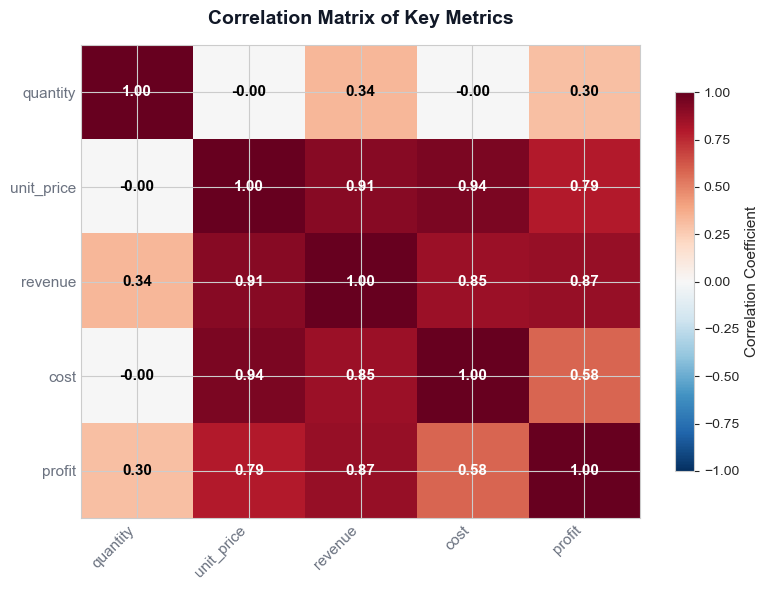


Strong Correlations (|r| > 0.7):
--------------------------------------------------
unit_price <-> revenue: 0.909 (positive)
unit_price <-> cost: 0.942 (positive)
unit_price <-> profit: 0.790 (positive)
revenue <-> cost: 0.855 (positive)
revenue <-> profit: 0.872 (positive)


In [53]:
# Select numeric columns for correlation analysis
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']
corr = df[num_cols].corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')

# Create heatmap with better styling
im = ax.imshow(corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='500')

# Set ticks and labels
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha='right', fontsize=11)
ax.set_yticklabels(num_cols, fontsize=11)

# Add correlation values as text
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        value = corr.iloc[i, j]
        # Use white text for dark cells, black for light cells
        text_color = 'white' if abs(value) > 0.5 else 'black'
        ax.text(j, i, f'{value:.2f}', ha='center', va='center',
                fontsize=11, fontweight='600', color=text_color)

# Title and styling
ax.set_title('Correlation Matrix of Key Metrics', 
            fontsize=14, fontweight='600', color='#111827', pad=15)

# Remove ticks
ax.tick_params(colors='#6b7280', length=0)

plt.tight_layout()
plt.show()

# Print strong correlations for reference
print("\nStrong Correlations (|r| > 0.7):")
print("-" * 50)
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        corr_val = corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            direction = "positive" if corr_val > 0 else "negative"
            print(f"{num_cols[i]} <-> {num_cols[j]}: {corr_val:.3f} ({direction})")

## Insights
- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
- Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
- Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

# Saving preprocessed dataframe

In [54]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


In [55]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# Key Business Insights Discovered
## Product Performance

- Identified top revenue-generating products for strategic focus
- Revealed product portfolio concentration and diversification opportunities
- Highlighted seasonal demand patterns for inventory planning

## Channel Effectiveness

- Discovered channel performance gaps and optimization opportunities
- Identified most profitable channels and resource allocation priorities
- Revealed market share distribution across sales channels

## Customer Intelligence

- Segmented customers into strategic categories (Champions, At Risk, etc.)
- Discovered revenue concentration following Pareto principle (80/20 rule)
- Identified high-value customer relationships requiring retention focus

## Regional Performance

- Mapped geographic performance variations and market opportunities
- Identified top-performing regions and underperforming territories
- Revealed regional market concentration and expansion potential

## Profitability Analysis

- Uncovered price-margin relationships across product lines
- Identified optimal pricing strategies for different product categories
- Revealed volatility patterns in profit margins by channel

## Author
Made with love by Gul Amiz Ibrahimi, all rights protected.